<b>Pregunta [1]:</b> <br>Abre este script y explica su contenido. Podras ver que se utiliza el primer dataset de ejemplo y se realiza la representacion gráfica del SVM. Comenta que tipo de kernel se esta utilizando y cuáles son los parámetros de entrenamiento.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=200)
svm_model.fit(X, y)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<b>Respuesta:</b><br>
Este script contiene las librerías necesarias y los pasos básicos para entrenar un pequeño modelo con el clasificador SVM. Posteriormente el script incluye las funciones para representar gráficamente la clasificación realizada, como se verá más adelante.
En primer lugar leemos el dataset mediante Pandas, así en la variable "X" se guardarán los datos correspondientes en cada atributo y las etiquetas de cada tupla se guardarán en la variable "y".
A continuación ya podemos crear nuestro modelo con con la función svm.SVC(kernel='linear',C=200) la cual lleva dos parámetros de entrenamiento:
<ul>
    <li>Kernel: Viene establecido como lineal, el cual puede ser muy útil para resolver problemas binarios como es el caso del "dateset1". Este creará vectores soporte que harán de separación entre clases.
    <li>C: Controla la compensación entre el error de entrenamiento y los márgenes, dando cierta flexibilidad a la clasificación y permitiendo algunos errores a la vez que los penaliza.
Por último el modelo se entrena con la función fit(X,y), que recibirá los valores de los atributos y las etiquetas de cada clase respectivamente.
</ul>

<b>Pregunta [2]:</b><br> Intuitivamente, ¿que hiperplano crees que incurrirá en un menor error de test en la tarea de separar las dos clases de puntos?.

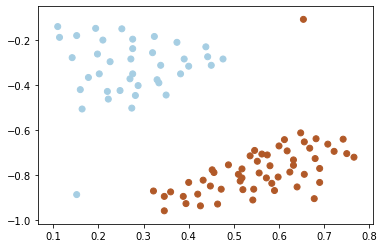

In [33]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=200)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer límites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
"""
# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
"""
plt.show()

<b>Respuesta:</b><br>
Habiendo comentado las líneas que dibujan los vectores soporte en la imagen, podemos concluir a simple viste de que un hiperplano lineal sería muy bueno para este tipo de problema. Ya que como se ha comentado antes es muy bueno en problemas binarios. Aunque tambíen podriamos afirmar que un RBF o polynomial serían adecuados, haciendo que los 'outlayers' queden más alejados del margen.

<b>Pregunta [3]:</b><br>
Modifica el script probando varios valores de C, en concreto, C ∈ {10^−2, 10^−1, 10^0, 10^1, 10^2, 10^3, 10^4}. Observa que sucede, explica porqué y escoge el valor mas adecuado. 

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  0.01


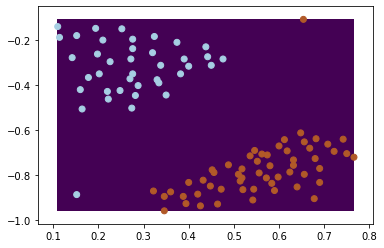

Valor de C:  0.1


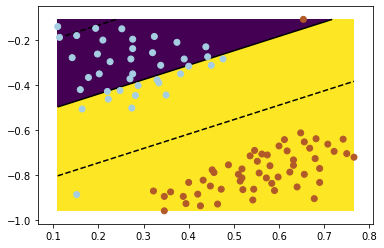

Valor de C:  1


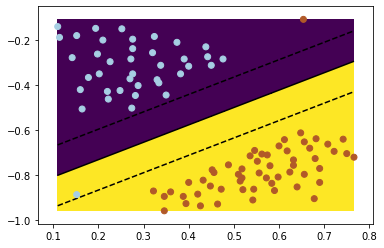

Valor de C:  10


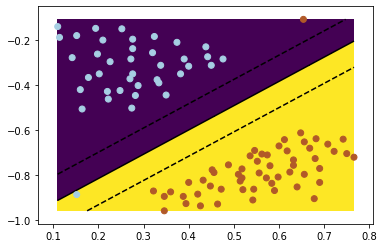

Valor de C:  100


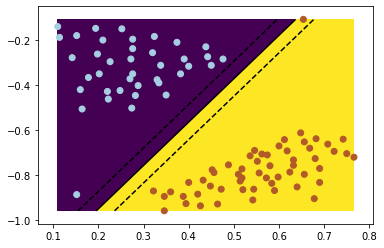

Valor de C:  1000


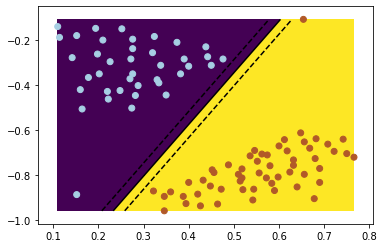

Valor de C:  10000


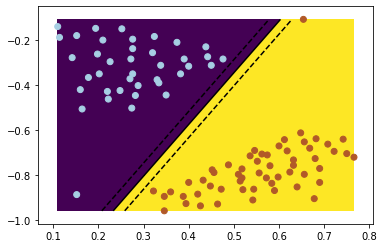

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

for i in [0.01,0.1,1,10,100,1000,10000]:
    # Entrenar el modelo SVM
    svm_model = svm.SVC(kernel='linear',C=i)
    svm_model.fit(X, y)

    # Representar los puntos
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Representar el hiperplano separador
    plt.axis('tight')
    # Extraer límites
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Hacer un plot a color con los resultados
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
    print('Valor de C: ',i)
    plt.show()


 <b>Respuesta: </b><br>
 Las gráficas se mostrarán respectivamente en: {10^−2, 10^−1, 10^0, 10^1, 10^2, 10^3, 10^4}
<ul>
<li>0.01: El algoritmo es incapaz de dibujar líneas, el error es tan permisivo que deja a las dos clases en una.
<li>0.1: Aunque se llega a separar en dos clases, el error sigue siendo sumamente permisivo, así que se puede apreciar una mala clasificación.
<li>1: La clasificación mejora sustancialmente, dejando un 'outlayer' mal clasificado
<li>10: La recta empieza a tomar camino para clasificar correctamente al último elemento que se quedó fuera.
<li>100: Todos los elementos están bien clasificados, obviando el 'outlayer' de la clase 2 que queda casi al margen.
<li>1000 y 10000: El error es muy poco permisivo en estos casos, aunque la clasificación esté muy bien hecha, no quiere decir que no se incurra en sobreentrenamiento.
</ul>
Concluimos en que el parámetro C se debe ajustar para permitir una buena clasificación sin llegar a sobreentrenar, y representar el modelo gráficamente es una buena opción para determinar dicho parámetro. En este caso, a partir de 100 obtenemos buenos resultados, así que sería conveniente buscar un valor entre 100 y 1000, ya que este último es demasiado grande. Así que nos quedaremos con el valor de 200 que venía puesto en el script.

<b>Pregunta [4]:</b><br> Prueba a lanzar una SVM lineal con los valores para C que se utilizaron en la pregunta anterior. ¿Consigues algun resultado satisfactorio en el sentido de que no haya errores en el conjunto de entrenamiento?. ¿Por que?.

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  0.01


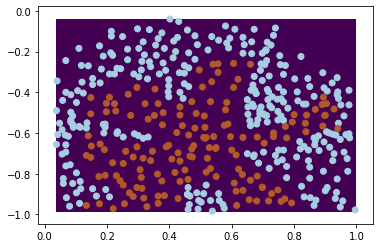

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  0.1


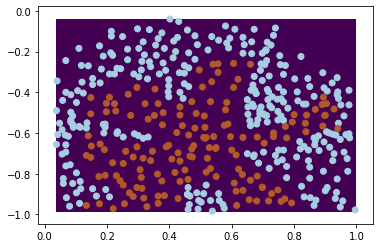

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  1


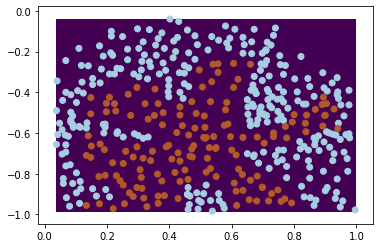

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  10


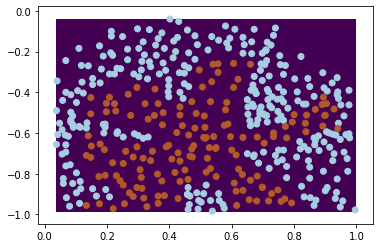

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  100


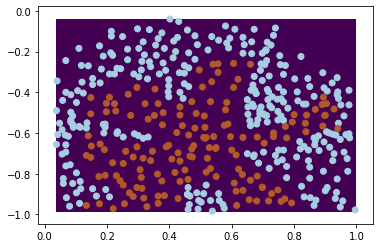

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  1000


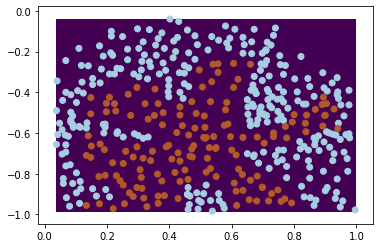

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


Valor de C:  10000


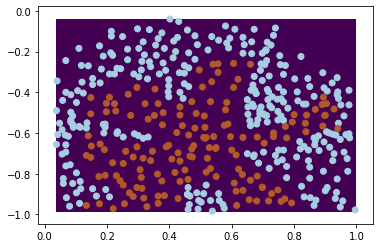

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset2.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

for i in [0.01,0.1,1,10,100,1000,10000]:
    # Entrenar el modelo SVM
    svm_model = svm.SVC(kernel='linear',C=i)
    svm_model.fit(X, y)

    # Representar los puntos
    plt.figure(1)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Representar el hiperplano separador
    plt.axis('tight')
    # Extraer límites
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Hacer un plot a color con los resultados
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
    print('Valor de C: ',i)
    plt.show()

<b>Respuesta: </b><br>
No importa el valor de C en absoluto. Lo que sucede es que el modelo lineal es incapaz de separar las clases de el "dataset2". luego para conseguir un buen resultado habrá que probar con modelos no lineales.

<b>Pregunta [5]:</b><br> Propon una configuración de SVM no lineal (utilizando el kernel tipo RBF o Gaussiano) que resuelva el problema. El resultado debería ser similar al de la Figura 3.
¿Que valores has considerado para C y para γ?. Ademas, incluye un ejemplo de una configuración de parámetros que produzca sobre-entrenamiento y otra que produzca infraentrenamiento.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset2.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='rbf',C=500, gamma=100)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer límites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.show()


<b>Respuesta: </b><br>
Al utilizar un modelo no lineal, el problema es más fácilmente resoluble y las clases están separadas con claridad. Se ha optado por un valor de C de 500 y un Gamma de 100. De esta forma incluso los puntos más "alejados" han podido entrar en la clase correspondiente. Es decir, ha cogido un 'outlayer' de la clase y se ha incluido en la representación.

Si establecemos configuraciones de C y Gamma muy bajas como C=0.1 y Gamma=10 se hace evidente un infraentrenamiento, mientras que para valores altos de estos parámetros, como C=1000 y Gamma= 500 se podría producir sobreentrenamiento.

<b>Pregunta [6]:</b></br> En este caso, ¿es el dataset linealmente separable?. A primera vista, ¿detectas puntos que presumiblemente sean outliers?, ¿por que?.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset3.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Entrenar el modelo SVM
svm_model = svm.SVC(kernel='linear',C=200)
svm_model.fit(X, y)

# Representar los puntos
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Representar el hiperplano separador
plt.axis('tight')
# Extraer límites
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
"""
# Hacer un plot a color con los resultados
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
"""
plt.show()


<b>Respuesta: </b><br>
Henmos comentado las líneas que muestran el clasificador para ver solo los puntos. Es evidente a simple vista que un clasificador lineal no valdría para este dataset nisiquiera tratandose de clasificación binaria ya que ninguna línea recta podría realizar ahí una buena clasificación, por no hablar de los 'outlayers' y otros patrones mezclados entre las dos clases. Sería conveniente probar modelos no lineales como el RBF, el cual parece a priori el más adecuado.

<b>Pregunta [7]:</b><br> Lanza una SVM para clasificar los datos, con objeto de obtener un resultado lo mas parecido al de la Figura 5. Ajusta el ancho del kernel en el intervalo γ ∈{0,02, 0,2, 2, 200}. Ajusta el parametro de coste en el intervalo C ∈ {0,02, 0,2, 2, 200}. Establece el valor de los parametros óptimos. Además, incluye un ejemplo de una configuración de parámetros que produzca sobre-entrenamiento y otra que produzca infra-entrenamiento.

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


C: 0.02
Gamma: 0.02


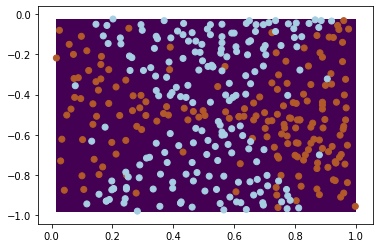

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


C: 0.02
Gamma: 0.2


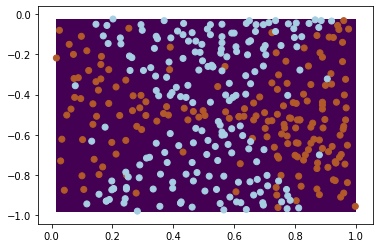

C: 0.02
Gamma: 2


C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


C: 0.02
Gamma: 200


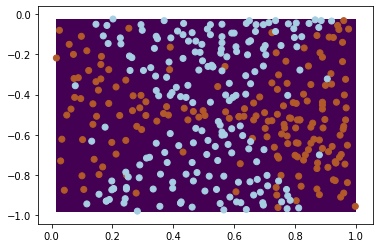

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: No contour levels were found within the data range.


C: 0.2
Gamma: 0.02


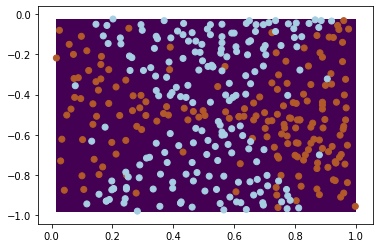

C: 0.2
Gamma: 0.2


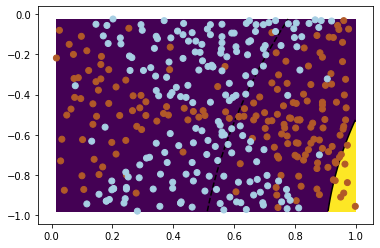

C: 0.2
Gamma: 2


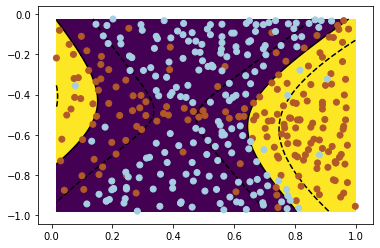

C: 0.2
Gamma: 200


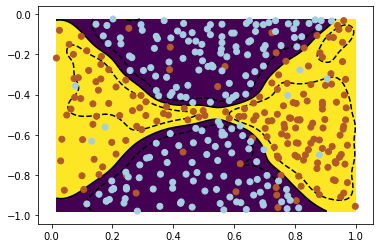

C: 2
Gamma: 0.02


C: 2
Gamma: 0.2


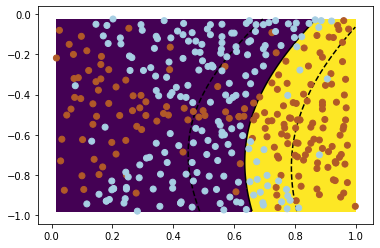

C: 2
Gamma: 2


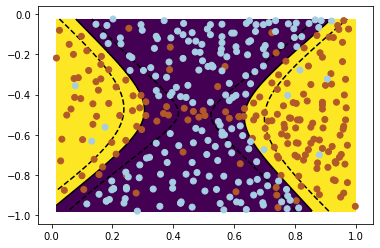

C: 2
Gamma: 200


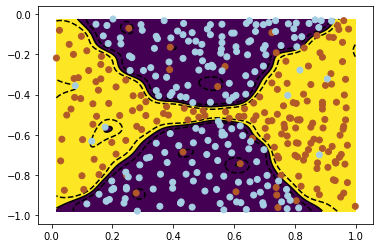

C: 200
Gamma: 0.02


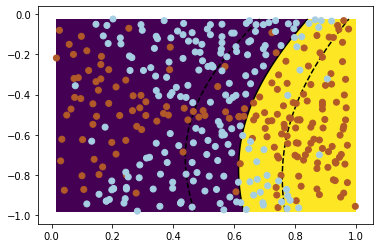

C: 200
Gamma: 0.2


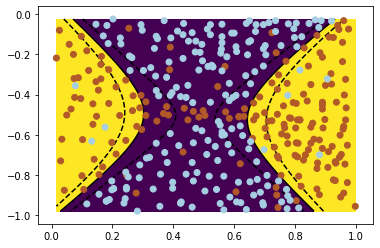

C: 200
Gamma: 2


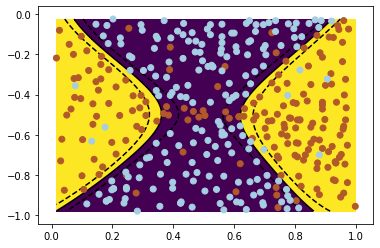

C: 200
Gamma: 200


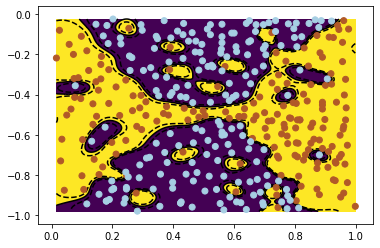

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Cargar el dataset
data = pd.read_csv('./BasesDatos/csv/dataset3.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

for par_c in [0.02,0.2,2,200]:
    for par_gamma in [0.02,0.2,2,200]:
        
        # Entrenar el modelo SVM
        svm_model = svm.SVC(kernel='rbf',C=par_c,gamma=par_gamma)
        svm_model.fit(X, y)

        # Representar los puntos
        plt.figure(1)
        plt.clf()
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

        # Representar el hiperplano separador
        plt.axis('tight')
        # Extraer límites
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        # Crear un grid con todos los puntos y obtener el valor Z devuelto por la SVM
        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Hacer un plot a color con los resultados
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'],
                        levels=[-.5, 0, .5])

        print('C:', par_c)
        print('Gamma:', par_gamma)
        plt.show()

<b>Respuesta: </b><br>
Se ha utilizado el kernel RBF y un doble bucle para combinar los parámetros C y Gamma y así mostrar más claramente el resultado.

El mejor resultado se produce con Gamma=200 y C=200, ya que aqui entran todas las clases en su sitio inlcuso los 'outliers', pero debemos tener en cuenta que esto puede significar un sobreentrenamiento del modelo.
Con lo cual, y ya que queremos aproximar el modelo a lo que se ve en la Figura 5 del guión y sin sobreentrenar, elegiremos C: 0.2 y Gamma: 200 como los mejores valores.
Por otro lado el infraentrenamiento se produciría con los valores bajos de Gamma.

<b>Pregunta [8]:</b><br> Vamos a reproducir este proceso en Python. Divide el dataset sintetico dataset3.csv en dos subconjuntos aleatorios de forma estratificada, con un 75 % de patrones en train y un 25 % de patrones en test. Realiza el proceso de entrenamiento completo estandarización, entrenamiento y predicción), utilizando los valores de C y γ que obtuviste en la ultima pregunta. Comprueba el porcentaje de buena clasificación que se obtiene para el conjunto de test. Repite el proceso mas de una vez para comprobar que los resultados dependen mucho de la semilla utilizada para hacer la partición.

In [10]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm

data = pd.read_csv('./BasesDatos/csv/dataset3.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

for i in range(1,11):
    print('Intento: ',i)
    sss = StratifiedShuffleSplit(test_size=0.25, train_size=0.75)

    for train_index, test_index in sss.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

    svm_model = svm.SVC(kernel='rbf',C=2,gamma=200)
    svm_model.fit(X_train, y_train)

    score = svm_model.score(X_test, y_test)*100

    print ("CCR: %f" % (score))

Intento:  1
CCR: 89.247312
Intento:  2
CCR: 89.247312
Intento:  3
CCR: 82.795699
Intento:  4
CCR: 90.322581
Intento:  5
CCR: 91.397849
Intento:  6
CCR: 86.021505
Intento:  7
CCR: 90.322581
Intento:  8
CCR: 89.247312
Intento:  9
CCR: 87.096774
Intento:  10
CCR: 88.172043


<b>Respuesta: </b><br>
Con StratifiedShuffleSplit dividiremos nuestro dataset en los porcentajes especificados en el enunciado. Despues en el bucle asignaremos los conjuntos de train y test a las entradas y salidas correspondientes. Por último solo queda entrenar el modelo como se ha hecho antes y despues utilizar la funcion score para obtener el porcentaje de bien clasificados.
Se utilizado un bucle para realizar varios intentos y visualizar así el cambio de CCR según la semilla que se vaya aplicando. Con 2 splits se puede llegar a obtener un CCR máximo de 94 y mínimo de 89.

<b>Pregunta [9]:</b><br> Amplía el codigo anterior para realizar el entrenamiento de la pregunta 8 sin necesidad de especificar los valores de C y γ. Compara los valores optimos obtenidos para ambos parametros con los que obtuviste a mano. Extiende el rango de valores a explorar, si es que lo consideras necesario.


In [11]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np

data = pd.read_csv('./BasesDatos/csv/dataset3.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

for i in range(1,11):
    print('Intento: ',i)
    sss = StratifiedShuffleSplit(test_size=0.25, train_size=0.75)

    for train_index, test_index in sss.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
    Cs = np.logspace(-5, 15, num=11, base=2)
    Gs = np.logspace(-15, 3, num=9, base=2)
    svm_model = svm.SVC(kernel='rbf')
    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs),n_jobs=-1,cv=5)
    optimo.fit(X_train, y_train)
    print('Mejores parametros: ')
    print(optimo.best_params_)
    print('Puntuacion: ')
    print (optimo.score(X_test,y_test))

Intento:  1


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 2048.0, 'gamma': 0.3535533905932738}
Puntuacion: 
0.8924731182795699
Intento:  2


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 128.0, 'gamma': 1.681792830507429}
Puntuacion: 
0.8924731182795699
Intento:  3


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 32.0, 'gamma': 1.681792830507429}
Puntuacion: 
0.8494623655913979
Intento:  4


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 32768.0, 'gamma': 0.07432544468767006}
Puntuacion: 
0.8494623655913979
Intento:  5


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 128.0, 'gamma': 8.0}
Puntuacion: 
0.8924731182795699
Intento:  6


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 128.0, 'gamma': 0.3535533905932738}
Puntuacion: 
0.8709677419354839
Intento:  7


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 8192.0, 'gamma': 0.3535533905932738}
Puntuacion: 
0.8279569892473119
Intento:  8


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 32768.0, 'gamma': 0.07432544468767006}
Puntuacion: 
0.9354838709677419
Intento:  9


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mejores parametros: 
{'C': 2048.0, 'gamma': 8.0}
Puntuacion: 
0.8709677419354839
Intento:  10
Mejores parametros: 
{'C': 128.0, 'gamma': 1.681792830507429}
Puntuacion: 
0.8817204301075269


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<b>Respuesta: </b><br>
Con GridSearchCV podemos encontrar los parámetros más optimos para nuestro algoritmo. Le pasaremos los valores de C y Gamma suministrados en el código del guión de la práctica. Una vez hecho eso se entrena el modelo como anteriormente y ya podremos ver los resultados obtenidos. Con una puntuación muy cercana al 90 en todo momento y además observamos que no se produce sobreentrenamiento ya que siempre se estan eligiendo parámetros optimos. Esto último es muy importante ya que de ir probando valores a mano podríamos incurrir en un sobreentrenamiento sin darnos cuenta.

<b>Pregunta [10]:</b><br> ¿Que inconvenientes observas en ajustar el valor de los parámetros “a mano”, viendo el porcentaje de buena clasificacion en el conjunto de test (lo que se hizo en la pregunta 8)?.

<b>Respuesta: </b><br>
Las pruebas realizadas a mano consumen más tiempo, puesto que habría que ir apuntando los resultados y comparandolos, por no hablar de que siempre existiría riesgo de que se nos pase algun valor bueno. Como se ha comentado antes, también podemos caer en el error del sobreentrenamiento.
Con la búsqueda de parámetros por GridSearch abarcaremos un mayor abanico de posibilidades sin perder tanto tiempo probando resultados nosotros mismos, además de evitar el sobreentrenamiento. Por otro lado estos métodos consumen poco tiempo en problemas con pocos patrones (y ya se aprecia una pequeña tardanza en la ejecución), con lo que puede que para problemas de mayor tamaño haya que buscar otro tipo de soluciones.

<b>Pregunta [11]:</b><br> Para estar seguros de que has entendido como se realiza la búsqueda de parametros, implementa de forma manual (sin usar GridSearchCV) la validación cruzada anidada tipo K-fold expuesta en esta seccion. Te puede ser útil el uso de listas por compresión y la clase StratifiedKFold. Compara los resultados con los que obtienes usando GridSearchCV.

In [16]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
'-----------------------------------------------'
VALORES = {
    'C': np.logspace(-5, 15, num=11, base=2),
    'kernel': ['rbf'],
    'gamma': np.logspace(-15, 3, num=9, base=2)
}

OPCIONES=[]
for C in VALORES['C']:
    for KERNEL in VALORES['kernel']:
        for GAMMA in VALORES['gamma']:
            OPCIONES.append((C,KERNEL,GAMMA))

OPCIONES = [(C,KERNEL,GAMMA) for C in VALORES['C'] for KERNEL in VALORES['kernel'] for GAMMA in VALORES['gamma']]

data = pd.read_csv('./BasesDatos/csv/dataset3.csv',header=None)

inputs = data.iloc[:,:-1].values
outputs = data.iloc[:,-1].values

SKF = StratifiedKFold(n_splits=5)
print(SKF)
#En SKFsplit guardamos todos los K-FOLD del dataset, usamos un for para si fuera de mas de 1 split.
RESULTADO =\
            {
            'C': 0,
            'kernel': ['rbf'],
            'gamma': 0,
            'score': 0
            }
MAX = 0
for train_index, test_index in SKF.split(inputs, outputs):
    X_train, X_test = inputs[train_index], inputs[test_index]
    Y_train, Y_test = outputs[train_index], outputs[test_index]
    for (C, KERNEL, GAMMA) in OPCIONES:
        svm_model = svm.SVC(kernel=KERNEL, C=C, gamma=GAMMA)
        svm_model.fit(X_train,Y_train)
        Y_pred = svm_model.predict(X_test)

        print(accuracy_score(Y_test, Y_pred))
        if accuracy_score(Y_test, Y_pred) > MAX:
            MAX = accuracy_score(Y_test, Y_pred)
            RESULTADO['C'] = C
            RESULTADO['gamma'] = GAMMA
            RESULTADO['score'] = accuracy_score(Y_test,Y_pred)

print(RESULTADO)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.43243243243243246
0.5135135135135135
0.5675675675675675
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.4594594594594595
0.40540540540540543
0.5135135135135135
0.6891891891891891
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5
0.40540540540540543
0.44594594594594594
0.6891891891891891
0.7027027027027027
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.40540540540540543
0.4189189189189189
0.5135135135135135
0.6756756756756757
0.6891891891891891
0.5135135135135135
0.5135135135135135
0.5135135135135135
0.36486486486486486
0.41891891891891

<b>Respuesta: </b><br>
Lo que haremos será guardar un conjunto de opciones posibles y luego probarlas en cada split.
El mejor resultado sale con los valores:
{'C': 2.0, 'kernel': ['rbf'], 'gamma': 0.3535533905932738, 'score': 1.0}
Podemos observar que nos da unos valores de C y Gamma para una puntuación del 100% eso quiere decir que es posible que se haya sobreentrenado el modelo. Por tanto en este caso sería mejor optar por el GridSearch.

<b>Pregunta [12]:</b><br> Utiliza el script que desarrollaste en la pregunta 9 para entrenar esta base de datos. Observe el valor de CCR obtenido para el conjunto de generalizacion y compáralo con el obtenido en practicas anteriores. El proceso puede demorarse bastante. Al finalizar, toma nota de los valores optimos obtenidos para los parámetros. 

In [21]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np

data = pd.read_csv('./BasesDatos/csv/train_nomnist.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_nomnist.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values


Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)
svm_model = svm.SVC(kernel='rbf')
optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs),n_jobs=-1,cv=5)
optimo.fit(X_train, y_train)

print('Mejores parametros: ')
print(optimo.best_params_)
print('Puntuacion: ')
print (optimo.score(X_test,y_test))  

Mejores parametros: 
{'C': 8.0, 'gamma': 0.0001451668841556056}
Puntuacion: 
0.91


<b>Respuesta</b><br>
Con una base de datos más grande como es la nomnist, se nota que el proceso de búsqueda de mejores parámetros con GridSearch comienza a ser más pesado, aún así no llega a ser excesivo y consigue sacar:
{'C': 8.0, 'gamma': 0.0001451668841556056} con un CCR de 0.91
Así que en lo que respecta al CCR resulta semejante con lo obtenido en los ejercicios anteriores.
Como tenemos fichero de train y test, en esta ocasión se ha prescindido de utilizar el StratifiedShufleSplit.

<b>Pregunta [13]:</b><br> Localiza donde se especifica el valor de K para la validacion cruzada interna y el rango de valores que se han utilizado para los parametros C y γ. ¿Como podrías reducir el tiempo computacional necesario para realizar el experimento?. Prueba a establecer K = 3, K = 5 y K = 10 y compara, utilizando una tabla, los tiempos computacionales obtenidos y los resultados de CCR en test.

In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
import time


data = pd.read_csv('./BasesDatos/csv/train_nomnist.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_nomnist.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values


Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)
svm_model = svm.SVC(kernel='rbf')

for i in [3,5,10]:
    inicio = time.perf_counter()
    optimo = GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs),n_jobs=-1,cv=i)
    optimo.fit(X_train, y_train)
    final = (time.perf_counter() - inicio)
    print('Valor de K: ',i)
    print('Mejores parametros: ')
    print(optimo.best_params_)
    print('Puntuacion: ')
    print (optimo.score(X_test,y_test))
    print ('Tiempo computacional: ')
    print (final)

Valor de K:  3
Mejores parametros: 
{'C': 2.0, 'gamma': 0.0006905339660024879}
Puntuacion: 
0.9133333333333333
Tiempo computacional: 
14.082156599999962
Valor de K:  5
Mejores parametros: 
{'C': 8.0, 'gamma': 0.0001451668841556056}
Puntuacion: 
0.91
Tiempo computacional: 
39.94720320000033
Valor de K:  10
Mejores parametros: 
{'C': 2.0, 'gamma': 0.0006905339660024879}
Puntuacion: 
0.9133333333333333
Tiempo computacional: 
124.23403430000008


<b>Respuesta: </b><br>
El valor de K se especifica mediante el parámetro "cv" en la creacion del objeto, lo mismo ocurre con los parametro de C y Gamma. Estos dos últimos parámetros estan especificados en un rango que viene determinado por:
Cs = np.logspace(-5, 15, num=11, base=2)
Gs = np.logspace(-15, 3, num=9, base=2)
Cuanto mayores sean estos rangos, más valores habrá que probar por tanto el tiempo computacional será mayor. Si disminuimos estos rangos el algoritmo tardará menos pero también corremos el riesgo de dejar valores buenos fuera.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-baqh{text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1"></th>
    <th class="tg-1wig">K=3</th>
    <th class="tg-1wig">K=5</th>
    <th class="tg-1wig">K=10</th>
  </tr>
  <tr>
    <td class="tg-1wig">CCR</td>
    <td class="tg-baqh">0.91333333</td>
    <td class="tg-baqh">0.91</td>
    <td class="tg-baqh">0.91333333</td>
  </tr>
  <tr>
    <td class="tg-1wig">TIEMPO</td>
    <td class="tg-baqh">14.082</td>
    <td class="tg-baqh">39.94</td>
    <td class="tg-baqh">124.33</td>
  </tr>
</table>

En este caso el CCR no varía con el numero de folds del algoritmo, pero si que crece el tiempo computacional enormemente. Con lo que tenemos que tener en cuenta que el numero de folds no siempre va a aumentar el CCR y el coste computacional puede ser altísimo. En el caso de que el CCR aumentase, podriamos decir que merece la pena si la diferencia fuese muy significativa, pero si la diferencia fuese escasa, sería preferible quedarnos con la opción que de menos tiempo computacional.

<b>Pregunta [14]:</b><br> Debes entrenar un modelo lineal de SVM con valores C = 10−2 C = 10−1 C = 10^0 y C = 10^1. Para ello utiliza un script similar al que usaste para la pregunta 9. Compara los resultados y establece la mejor configuracion.

In [3]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
import numpy as np
import time

data = pd.read_csv('./BasesDatos/csv/train_spam.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_spam.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values

for i in [0.01,0.1,1,10]:
    inicio = time.perf_counter()
    svm_model = svm.SVC(kernel='linear', C=i)
    svm_model.fit(X_train, y_train)
    final = (time.perf_counter() - inicio)
    print('Valor de C: ', i)
    print('Puntuacion Test: ',svm_model.score(X_test,y_test))
    print('Tiempo computacional: ', final)

Valor de C:  0.01
Puntuacion Test:  0.98
Tiempo computacional:  7.503465274999996
Valor de C:  0.1
Puntuacion Test:  0.989
Tiempo computacional:  5.206470428999978
Valor de C:  1
Puntuacion Test:  0.978
Tiempo computacional:  4.4185073809999835
Valor de C:  10
Puntuacion Test:  0.975
Tiempo computacional:  4.270380024000019


<b>Respuesta: </b><br>
Dejaremos el valor de Gamma por defecto ya que no se pide para este apartado, además no utilizaremos GridSearch debido a la enorme cantidad de patrones en esta base de datos y el tiempo computacional que esto supondría, con lo que nos limitaremos a buscar valores para el parámetro C.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-yla0{font-weight:bold;text-align:left;vertical-align:middle}
.tg .tg-nrix{text-align:center;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1"></th>
    <th class="tg-yla0">C=0.01</th>
    <th class="tg-yla0">C=0.1</th>
    <th class="tg-yla0">C=1</th>
    <th class="tg-1wig">C=10</th>
  </tr>
  <tr>
      <td class="tg-yla0"><b>CCR</b></td>
    <td class="tg-nrix">0.98</td>
    <td class="tg-nrix">0.989</td>
    <td class="tg-nrix">0.978</td>
    <td class="tg-baqh">0.975</td>
  </tr>
  <tr>
      <td class="tg-yla0"><b>Tiempo</b></td>
    <td class="tg-nrix">7.05</td>
    <td class="tg-nrix">5.2</td>
    <td class="tg-nrix">4.41</td>
    <td class="tg-baqh">4.27</td>
  </tr>
</table>

Encontramos un mejor valor de C en 0.1, aunque todas las ejecuciones muestran una buena puntuación, a partir de un C de 0.1 la puntuación de test comienza a bajar, mostrando un posible sobreentrenamiento. De hecho, si se sacase la puntuacion de train, observaríamos como estaría por el 100%, siendo una muestra más del sobreentrenamiento.

<b> Pregunta [15]:</b><br> Para la mejor configuracion, construye la matriz de confusión y establece cuales son los correos en los que la SVM se equivoca. Consulta las variables de entrada para los correos que no se clasifican correctamente y razona el motivo. Ten en cuenta que para cada patron, cuando xi es igual a 1 quiere decir que la palabra i-esima del vocabulario aparece, al menos una vez, en el correo.

In [1]:
import pandas as pd
from sklearn import svm
import numpy as np
import time
from sklearn.metrics import confusion_matrix

data = pd.read_csv('./BasesDatos/csv/train_spam.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_spam.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values

vocabulario = pd.read_csv('./etiquetasYVocabulario/vocab.txt', header=None,delimiter='\t')
palabras=vocabulario.iloc[:,-1]

inicio = time.perf_counter()
svm_model = svm.SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)
final = (time.perf_counter() - inicio)

print('Puntuacion Test: ',svm_model.score(X_test,y_test))
print('Tiempo computacional: ', final)
print('Matriz de confusion: ')
print(confusion_matrix(y_test,svm_model.predict(X_test)))

print('Correos mal clasificados')
cont=1
for i,j in zip(y_test,svm_model.predict(X_test)):
    if i!=j:
        print('Indice del correo:',cont,'Clase real: ',i,'Clase predicha:', j)
        print('Palabras encontradas: ')
        cont2=0
        for k in X_test[cont][:]:
            if k==1:
                print(palabras[cont2])
            cont2=cont2+1
    cont=cont+1

Puntuacion Test:  0.989
Tiempo computacional:  3.3344021999999995
Matriz de confusion: 
[[684   8]
 [  3 305]]
Correos mal clasificados
Indice del correo: 10 Clase real:  1 Clase predicha: 0
Palabras encontradas: 
about
am
and
as
caus
chri
control
copi
cv
dave
email
emailaddr
error
exmh
for
from
garrigu
get
haven
here
httpaddr
in
it
jul
list
mai
mail
main
medic
messag
number
on
onli
phone
sinc
sometim
the
thi
to
too
type
updat
wed
well
window
won
worker
write
wrote
www
Indice del correo: 22 Clase real:  0 Clase predicha: 1
Palabras encontradas: 
add
all
and
becaus
by
can
chang
copyright
daili
from
go
have
headlin
httpaddr
in
it
log
mailer
messag
more
number
on
or
other
page
perl
pleas
post
prefer
pudg
receiv
releas
reserv
right
septemb
stop
subscrib
there
thi
thursdai
to
tool
us
user
you
your
Indice del correo: 59 Clase real:  0 Clase predicha: 1
Palabras encontradas: 
abil
about
actual
adam
again
ago
aid
alb
allow
along
and
ani
anoth
anyon
anywai
approach
ar
aren
around
as
at
awar
bb


<b>Respuesta: </b><br>
La mejor configuración que obtuvimos fué un C=0.1 y el valor de gamma por defecto, el cual es 'auto'. Con estos valores obtendremos una matriz de confusión bastante buena. En ella podemos ver que el algoritmo tan solo se ha equivocado en 11 correos. Estos correos se imprimirán también por pantalla al ejecutar el script, de forma que obtendremos los siguientes:
9 21 58 73 147 328 407 526 560 842 881
En la ejecución del script podremos ver las palabras que aparecen en los correos mal clasificados, junto con su clase real y predicha.
Tras observar los resultados de las palabras encontradas, podemos concluir en que el algoritmo ha concluido los correos que resultan más confusos. Esto se debe a que el spam suele tener palabras como "free", "click" o "account", pero estas palabras también pueden estar en correo serio. Por tanto observando los resultados, vemos correos con palabras como estas o similares que han estado clasificados como no spam o viceversa.
No obstante debemos tener en cuenta que pese a la buena puntuación en test, es posible que algunos de los fallos también sean en correos fácilmente reconocibles, igual que ocurria en la nomnist.

<b>Pregunta [16]:</b><br> Compara los resultados obtenidos con los resultados utilizando una red RBF.Para ello, haz uso del programa desarrollado en la practica anterior. Utiliza solo una semilla (la que mejor resultado obtenga).

In [20]:
import click
import pandas as pd
import numpy as np
import math
import time
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
"""
@click.command()
@click.option('--train_file', '-t', default=None, required=True,help=u'Fichero con los datos de entrenamiento.')
@click.option('--test_file', '-T', default=None, required=False, help=u'Fichero con los datos de test.')
@click.option('--classification', '-c', is_flag=True,help=u'ue indica si el problema es de clasiﬁcacion. Si no se especiﬁca, supondremos que el problema es de regresion.')
@click.option('--ratio_rbf', '-rb', default=0.1, required=False,help=u'Indica la razon.')
@click.option('--l2', '-l', is_flag=True, help=u'Boleano que se usa para la reguluzación L2.')
@click.option('--outputs', '-o', default=1, required=False,help=u'Numero de salidas.')
@click.option('--eta', '-e', default=(1 * math.exp(-5)), required=False, help=u'Ajuste del factor eta.')
@click.option('--matrix_m', '-m', is_flag=True,help=u'Boleano que se usa para mostrar la matriz de confusion')
# TODO incluir el resto de parámetros...
"""
def entrenar_rbf_total(train_file='./BasesDatos/csv/train_spam.csv', test_file='./BasesDatos/csv/test_spam.csv', classification=True, ratio_rbf=0.30, l2=True, eta=1 * math.exp(-5), outputs=1, matrix_m=True):

    if train_file is None:
        print("No se ha especificado el conjunto de entrenamiento (-t)")
        return
    if test_file is None:
        test_file = train_file

    train_mses = np.empty(5)
    train_ccrs = np.empty(5)
    test_mses = np.empty(5)
    test_ccrs = np.empty(5)
    tiempos = np.empty(5)
    for s in range(1,6,1):
        print("-----------")
        print("Semilla: %d" % s)
        print("-----------")
        np.random.seed(s)
        inicio = time.time()
        train_mses[s - 1], test_mses[s - 1], train_ccrs[s - 1], test_ccrs[s - 1] = entrenar_rbf(train_file, test_file,
                                                                                                classification,
                                                                                                ratio_rbf, l2, eta,
                                                                                                outputs, matrix_m)
        fin = time.time()
        tiempos[s - 1] = fin - inicio
        print("Tiempo de ejecución: %f" % tiempos[s - 1])
        print("MSE de entrenamiento: %f" % train_mses[s - 1])
        print("MSE de test: %f" % test_mses[s - 1])
        print("CCR de entrenamiento: %.2f%%" % train_ccrs[s - 1])
        print("CCR de test: %.2f%%" % test_ccrs[s - 1])

    print("*********************")
    print("Resumen de resultados")
    print("*********************")
    print("Tiempo medio: %f" % np.mean(tiempos))
    print("MSE de entrenamiento: %f +- %f" % (np.mean(train_mses), np.std(train_mses)))
    print("MSE de test: %f +- %f" % (np.mean(test_mses), np.std(test_mses)))
    print("CCR de entrenamiento: %.2f%% +- %.2f%%" % (np.mean(train_ccrs), np.std(train_ccrs)))
    print("CCR de test: %.2f%% +- %.2f%%" % (np.mean(test_ccrs), np.std(test_ccrs)))
    

def entrenar_rbf(train_file, test_file, classification, ratio_rbf, l2, eta, outputs, matrix_m):
 
    train_inputs, train_outputs, test_inputs, test_outputs = lectura_datos(train_file, test_file, outputs)
    # TODO: Obtener num_rbf a partir de ratio_rbf
    num_rbf = int(np.size(train_inputs, 0) * ratio_rbf)

    print("Número de RBFs utilizadas: %d" % (num_rbf))
    kmedias, distancias, centros = clustering(classification, train_inputs, train_outputs, num_rbf)

    radios = calcular_radios(centros, num_rbf)

    matriz_r = calcular_matriz_r(distancias, radios)
    if not classification:
        coeficientes = invertir_matriz_regresion(matriz_r, train_outputs)
    else:
        logreg = logreg_clasificacion(matriz_r, train_outputs, eta, l2)


    distancias_test = distance.cdist(test_inputs, centros, metric='euclidean')
    matriz_r_test = calcular_matriz_r(distancias_test, radios)

    if not classification:
        # MSE
        matriz_y_estimada_train = np.dot(matriz_r, coeficientes)
        matriz_y_estimada_test = np.dot(matriz_r_test, coeficientes)
        train_mse = mean_squared_error(train_outputs, matriz_y_estimada_train)
        test_mse = mean_squared_error(test_outputs, matriz_y_estimada_test)
        #CCR
        train_ccr = accuracy_score(matriz_y_estimada_train.round(), train_outputs.round()) * 100
        test_ccr = accuracy_score(matriz_y_estimada_test.round(), test_outputs.round()) * 100

    else:

        # CCR
        train_ccr = logreg.score(matriz_r, train_outputs) * 100
        test_ccr = logreg.score(matriz_r_test, test_outputs) * 100

        # MSE en train y test
        #Binarizacion de resultados
        # Example: label_binarize(['yes', 'no', 'no', 'yes'], classes=['no', 'yes'])
        # Result array([[1],[0],[0], [1]])

        encoder = OneHotEncoder(categories='auto')#Transformar a arrays de 1 dimension
        train_outputs_binarized = encoder.fit_transform(train_outputs).toarray()
        test_outputs_binarized = encoder.fit_transform(test_outputs).toarray()

        train_mse = mean_squared_error(y_true=train_outputs_binarized, y_pred=logreg.predict_proba(matriz_r))
        test_mse = mean_squared_error(y_true=test_outputs_binarized, y_pred=logreg.predict_proba(matriz_r_test))

        # Matriz de confusión
        matrix_confusion = confusion_matrix(test_outputs, logreg.predict(matriz_r_test))
        print(matrix_confusion)

    return train_mse, test_mse, train_ccr, test_ccr


def lectura_datos(fichero_train, fichero_test, outputs):
    #añadir .to_numpy() para la lectura correcta
    train = pd.read_csv(fichero_train, header=None).to_numpy()
    test = pd.read_csv(fichero_test, header=None).to_numpy()

    #Se utiliza la variable outputs para delimitar la lectura de los conjuntos
    return train[:, :-outputs], train[:, -outputs:], test[:, :-outputs], test[:, -outputs:]


def inicializar_centroides_clas(train_inputs, train_outputs, num_rbf):

    # Particion estratificada e inicializacion con los primeos [0][0]
    stratified_split = StratifiedShuffleSplit(n_splits=1, train_size=num_rbf, test_size=None)
    splits = list(stratified_split.split(train_inputs, train_outputs))[0][0]
    return train_inputs[splits]


def clustering(clasificacion, train_inputs, train_outputs, num_rbf):

    # TODO: Completar el código de la función
    #La inicializacion tambien puede ser k-Means++
    if clasificacion == True:
        centros = inicializar_centroides_clas(train_inputs, train_outputs, num_rbf)
        kmedias = KMeans(n_clusters=num_rbf, init=centros, n_init=1, max_iter=300, n_jobs=-1)
    else:
        kmedias = KMeans(n_clusters=num_rbf, init='random', max_iter=300, n_jobs=-1)

    # obtencion de la matriz de distancias
    distancias = kmedias.fit_transform(train_inputs)

    # Obtencion de los centros
    centros = kmedias.cluster_centers_

    return kmedias, distancias, centros


def calcular_radios(centros, num_rbf):

    #Funcion que calcula la matriz de distancias con la distancia euclidea, por defecto Y=none
    matriz_distancias = pairwise_distances(centros, Y=None, metric="euclidean")

    #Aplicar sum(filas)/ 2 * num_rbf-1
    # axis=1 filas
    radios = matriz_distancias.sum(axis=1) / (2 * (num_rbf - 1))
    return radios


def calcular_matriz_r(distancias, radios):

    # Si la distancia es mayor que el radio entonces la salida de la neurona es 0
    # Si la distancia es menor que el radio, la salida de la neurona es 1

    sesgo = np.ones(distancias.shape[0])
    matriz_r = np.exp(-np.square(distancias) / (np.square(radios) * 2))
    # Añadimos el sesgo en columna con column_stack (apliando)
    matriz_r = np.column_stack((matriz_r, sesgo))

    return matriz_r


def invertir_matriz_regresion(matriz_r, train_outputs):

    #Calculo de la pseudoinversa (mirar la presentacion)
    coeficientes = np.dot(np.dot(np.linalg.pinv(np.dot(matriz_r.T, matriz_r)), matriz_r.T), train_outputs)

    return coeficientes


def logreg_clasificacion(matriz_r, train_outputs, eta, l2):

    # TODO: Completar el código de la función
    # Penalty sed to specify the norm used in the penalization
    if l2:
        logreg = LogisticRegression(penalty='l2', C=1 / eta, fit_intercept=False, multi_class='auto',
                                    solver='liblinear', max_iter=500)
    else:
        logreg = LogisticRegression(penalty='l1', C=1 / eta, fit_intercept=False, multi_class='auto',
                                    solver='liblinear', max_iter=500)
    #Entrenar
    if train_outputs.shape[1] == 1:
        train_outputs = np.ravel(train_outputs)
    logreg.fit(matriz_r, train_outputs)

    return logreg


if __name__ == "__main__":
    entrenar_rbf_total()

-----------
Semilla: 1
-----------
Número de RBFs utilizadas: 1200


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1192) found smaller than n_clusters (1200). Possibly due to duplicate points in X.
  return_n_iter=True)


[[687   5]
 [  5 303]]
Tiempo de ejecución: 17.385776
MSE de entrenamiento: 0.003471
MSE de test: 0.008031
CCR de entrenamiento: 99.62%
CCR de test: 99.00%
-----------
Semilla: 2
-----------
Número de RBFs utilizadas: 1200


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1196) found smaller than n_clusters (1200). Possibly due to duplicate points in X.
  return_n_iter=True)


[[687   5]
 [  6 302]]
Tiempo de ejecución: 15.963972
MSE de entrenamiento: 0.003878
MSE de test: 0.009214
CCR de entrenamiento: 99.65%
CCR de test: 98.90%
-----------
Semilla: 3
-----------
Número de RBFs utilizadas: 1200


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1195) found smaller than n_clusters (1200). Possibly due to duplicate points in X.
  return_n_iter=True)


[[689   3]
 [  6 302]]
Tiempo de ejecución: 15.488790
MSE de entrenamiento: 0.004138
MSE de test: 0.007827
CCR de entrenamiento: 99.52%
CCR de test: 99.10%
-----------
Semilla: 4
-----------
Número de RBFs utilizadas: 1200


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1194) found smaller than n_clusters (1200). Possibly due to duplicate points in X.
  return_n_iter=True)


[[688   4]
 [  8 300]]
Tiempo de ejecución: 16.222677
MSE de entrenamiento: 0.003789
MSE de test: 0.008256
CCR de entrenamiento: 99.60%
CCR de test: 98.80%
-----------
Semilla: 5
-----------
Número de RBFs utilizadas: 1200


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1198) found smaller than n_clusters (1200). Possibly due to duplicate points in X.
  return_n_iter=True)


[[688   4]
 [  8 300]]
Tiempo de ejecución: 15.405257
MSE de entrenamiento: 0.003259
MSE de test: 0.009006
CCR de entrenamiento: 99.72%
CCR de test: 98.80%
*********************
Resumen de resultados
*********************
Tiempo medio: 16.093294
MSE de entrenamiento: 0.003707 +- 0.000309
MSE de test: 0.008467 +- 0.000547
CCR de entrenamiento: 99.62% +- 0.07%
CCR de test: 98.92% +- 0.12%


<b>Respuesta: </b><br>
Para este experimento hemos utilizado el script de la práctica anterior, al cual le pasaremos la base de datos spam. Los parámetros de script se han dejado por defecto:

<ol>
    <li> <b>ratio_rbf:</b> Variará según vemos en la tabla de abajo
    <li> <b>l2:</b> True
    <li> <b>eta:</b> 1*10^-5
    <li> <b>outputs:</b> 1
    <li> <b>matrix_m:</b> True
</ol>
Mientras que estudiaremos los mejores resultados variando el número de neuronas rbf (eligiendo los resultados de la mejor semilla). Tendremos que aumentar poco a poco el número de neuronas para evitar sobreentranamiento.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-yla0{font-weight:bold;text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yla0">NUM RBF</th>
    <th class="tg-yla0">200</th>
    <th class="tg-yla0">400</th>
    <th class="tg-yla0">800</th>
    <th class="tg-yla0">1000</th>
    <th class="tg-1wig">1200</th>
  </tr>
  <tr>
    <td class="tg-yla0"><b>CCR TRAIN<\b></td>
    <td class="tg-cly1">97.92</td>
    <td class="tg-cly1">98.83</td>
    <td class="tg-cly1">99.38</td>
    <td class="tg-cly1">99.52</td>
    <td class="tg-0lax">99.62</td>
  </tr>
  <tr>
    <td class="tg-yla0"><b>CCR TEST<\b></td>
    <td class="tg-cly1">98.70</td>
    <td class="tg-cly1">98.60</td>
    <td class="tg-cly1">99.00</td>
    <td class="tg-cly1">98.90</td>
    <td class="tg-0lax">99.00</td>
  </tr>
</table>

En la tabla observamos que las puntuaciones som buenas para todos los números de RBF, una puntuación similar a la que hemos estado obteniendo en esta práctica. Es más, si ejecutamos el script y observamos la matriz de confusión, podemos ver que el número de fallos suele estar entre los 10-14 siempre, al igual que en el ejercicio anterior donde fallaban 11 correos.
Es evidente que tanto este método como el anterior son buenos para tratar esta base de datos, sin embargo, hemos de tener en cuenta que el tiempo computacional de la RBF es mayor, y apenas se obtiene una puntuación superior. Con lo cual para este problema, sería conveniente utilizar el modelo SVM Lineal.


<b>Pregunta [17]:</b><br> Entrena una SVM no lineal y compara los resultados

In [34]:
import pandas as pd
from sklearn import svm
import numpy as np
import time
from sklearn.metrics import confusion_matrix

data = pd.read_csv('./BasesDatos/csv/train_spam.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_spam.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values

vocabulario = pd.read_csv('./etiquetasYVocabulario/vocab.txt', header=None,delimiter='\t')
palabras=vocabulario.iloc[:,-1]

inicio = time.perf_counter()
svm_model = svm.SVC(kernel='rbf', C=0.1)
svm_model.fit(X_train, y_train)
final = (time.perf_counter() - inicio)

print('Puntuacion Test: ',svm_model.score(X_test,y_test))
print('Tiempo computacional: ', final)
print('Matriz de confusion: ')
print(confusion_matrix(y_test,svm_model.predict(X_test)))


C:\Users\Carlos\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Puntuacion Test:  0.706
Tiempo computacional:  15.79392419999931
Matriz de confusion: 
[[692   0]
 [294  14]]


<b>Respuesta: </b><br>
Si ejecutamos el script con un modelo no lineal como RBF y dejamos el valor de C anterior, observamos que los resultados son muy malos.
Con lo que sería conveniente encontrar un valor más óptimo para C y Gamma. Pero al tartarse de una base de datos muy grande, utilizar GridSearch tomaría muchísimo tiempo.

In [31]:
import pandas as pd
from sklearn import svm
import numpy as np
import time
from sklearn.metrics import confusion_matrix

data = pd.read_csv('./BasesDatos/csv/train_spam.csv',header=None)
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values

data = pd.read_csv('./BasesDatos/csv/test_spam.csv',header=None)
X_test = data.iloc[:,:-1].values
y_test = data.iloc[:,-1].values

vocabulario = pd.read_csv('./etiquetasYVocabulario/vocab.txt', header=None,delimiter='\t')
palabras=vocabulario.iloc[:,-1]

inicio = time.perf_counter()
svm_model = svm.SVC(kernel='rbf', C=100, gamma='auto')
svm_model.fit(X_train, y_train)
final = (time.perf_counter() - inicio)

print('Puntuacion Test: ',svm_model.score(X_test,y_test))
print('Tiempo computacional: ', final)
print('Matriz de confusion: ')
print(confusion_matrix(y_test,svm_model.predict(X_test)))

print('Correos mal clasificados')
cont=1
for i,j in zip(y_test,svm_model.predict(X_test)):
    if i!=j:
        print('Indice del correo:',cont,'Clase real: ',i,'Clase predicha:', j)
        print('Palabras encontradas: ')
        cont2=0
        for k in X_test[cont][:]:
            if k==1:
                print(palabras[cont2])
            cont2=cont2+1
    cont=cont+1

Puntuacion Test:  0.99
Tiempo computacional:  3.4737791000006837
Matriz de confusion: 
[[684   8]
 [  2 306]]
Correos mal clasificados
Indice del correo: 10 Clase real:  1 Clase predicha: 0
Palabras encontradas: 
about
am
and
as
caus
chri
control
copi
cv
dave
email
emailaddr
error
exmh
for
from
garrigu
get
haven
here
httpaddr
in
it
jul
list
mai
mail
main
medic
messag
number
on
onli
phone
sinc
sometim
the
thi
to
too
type
updat
wed
well
window
won
worker
write
wrote
www
Indice del correo: 22 Clase real:  0 Clase predicha: 1
Palabras encontradas: 
add
all
and
becaus
by
can
chang
copyright
daili
from
go
have
headlin
httpaddr
in
it
log
mailer
messag
more
number
on
or
other
page
perl
pleas
post
prefer
pudg
receiv
releas
reserv
right
septemb
stop
subscrib
there
thi
thursdai
to
tool
us
user
you
your
Indice del correo: 59 Clase real:  0 Clase predicha: 1
Palabras encontradas: 
abil
about
actual
adam
again
ago
aid
alb
allow
along
and
ani
anoth
anyon
anywai
approach
ar
aren
around
as
at
awar
bb
b

<b>Respuesta: </b><br>
Despues de probar varias combinaciones, se ha optado por un valor de C=100 y dejar el parámetro gamma en 'auto'. Así se consiguen los resultados que podemos ver en la ejecución del script. Algo mejores que con SVM Lineal y el mejor valor de C que se encontró en los ejercicios anteriores, aunque en esta ocasión el tiempo de cómputo es algo más alto. También observamos que las palabras confundidas son más o menos similares a las vistas anteriormente. Con lo que en relacion tiempo computacional-error, el SVM Lineal gana para este problema.
En definitiva, los resultados son más o menos similares en todos los experimentos con esta base de datos, diferenciandose más significativamente en el tiempo.
Se puede concluir en que es importante estudiar los parámetros de los clasificadores para conseguir los mejores resultados, ya sea probando a mano en base a los conocimientos que tenemos o utilizando GridSearch, aunque esta última opción no es viable para bases de datos muy grandes, sin embargo disponiendo de máquinas más potentes sería una opción a considerar si hubiese que probar una cantidad de parámetros muy amplia para un problema concreto